# Классический градиентный спуск

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

Рассмотрены следующие функции:
- хорошо обусловленная (µ ≃ 1) двумерная квадратичная функция;
- плохо обусловленная (µ > 10) двумерная квадратичная функция;
- функция Розенброка.

In [163]:
def f_well(x):
    return 0.8 * x[0]**2 + 1.2 * x[1]**2 + 0.4 * x[0]*x[1]

def f_poor(x):
    return 2 * x[0]**2 + 15 * x[1]**2 - 8 * x[0]*x[1] + 20 * x[0] - 30 * x[1] + 23

def f_rozen(x):
    return (1-x[0])**2 + 100 * (x[1]-x[0]**2)**2

In [164]:
x1_min = -10.0
x1_max = 10.0
x2_min = -10.0
x2_max = 10.0
N = 1000

x = np.empty((2,), dtype=object)
x[0] = np.linspace(x1_min, x1_max, N)
x[1] = np.linspace(x2_min, x2_max, N)
X, Y = np.meshgrid(x[0], x[1])

func_names = [f_well, f_poor, f_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_func = len(func_names)

Z = np.empty((N_func,), dtype=object)

for k, func in enumerate(func_names):
    Z[k] = func([X, Y])

In [165]:
user_figsize = (10,5)
user_fontsize = 24
user_tickfontsize = 12

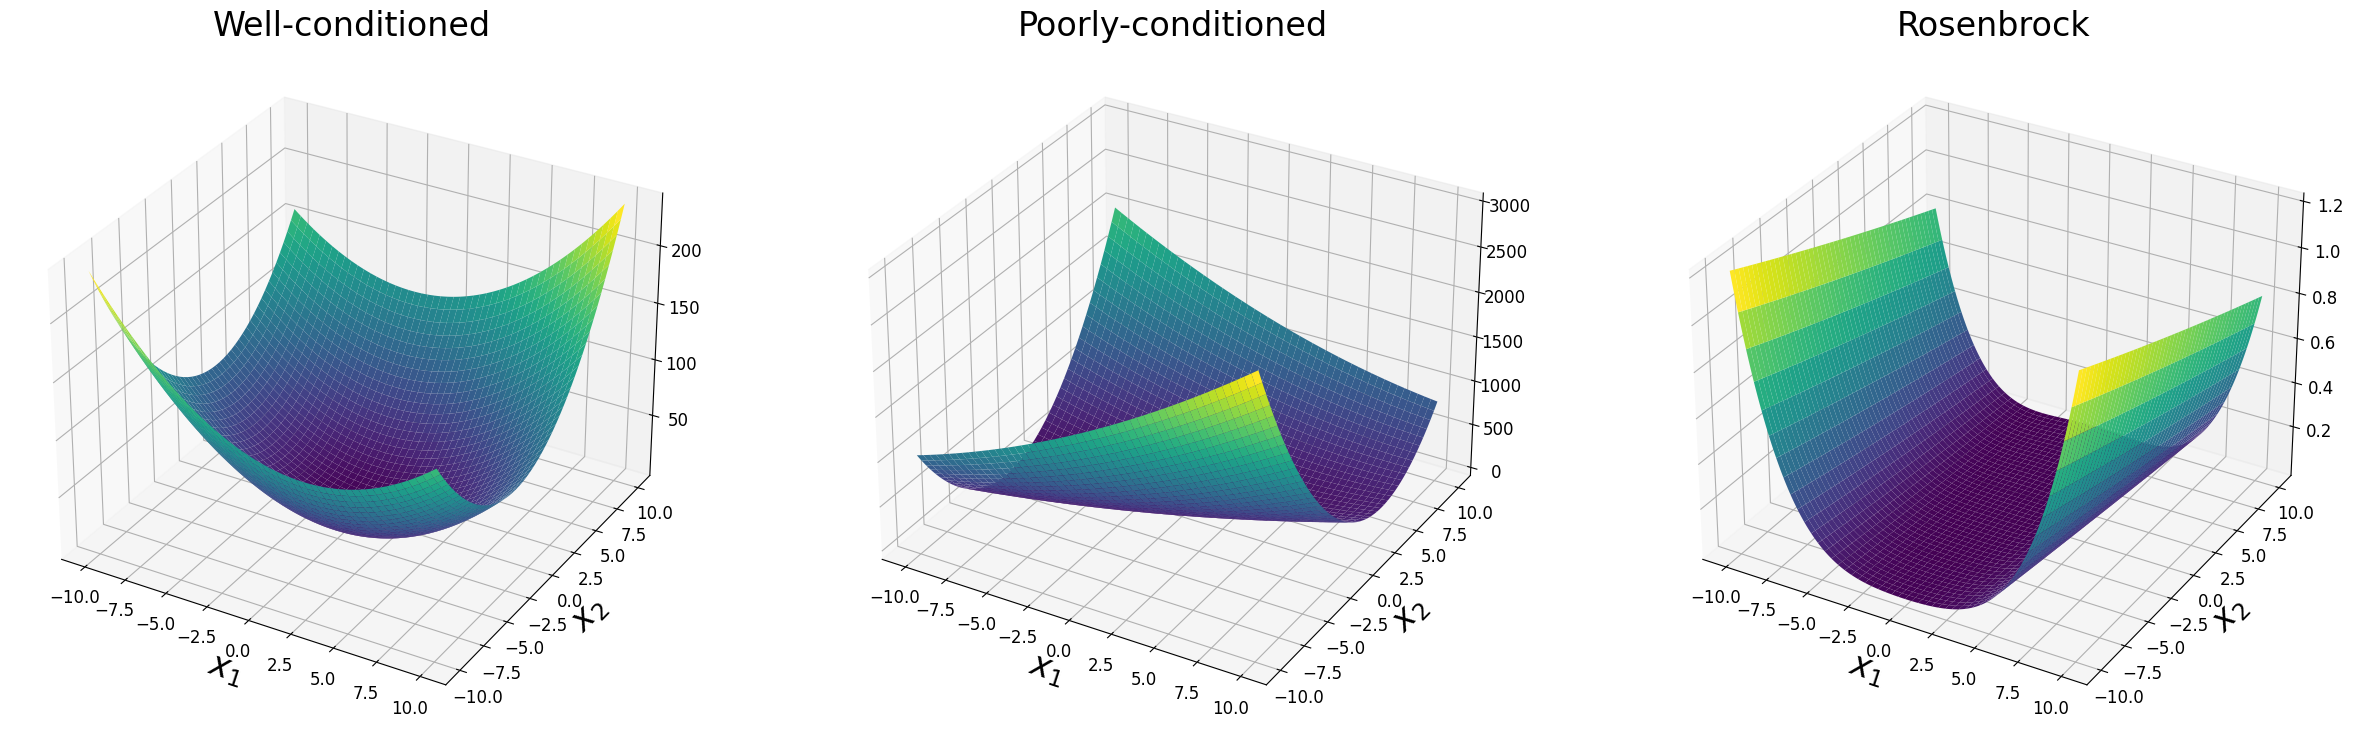

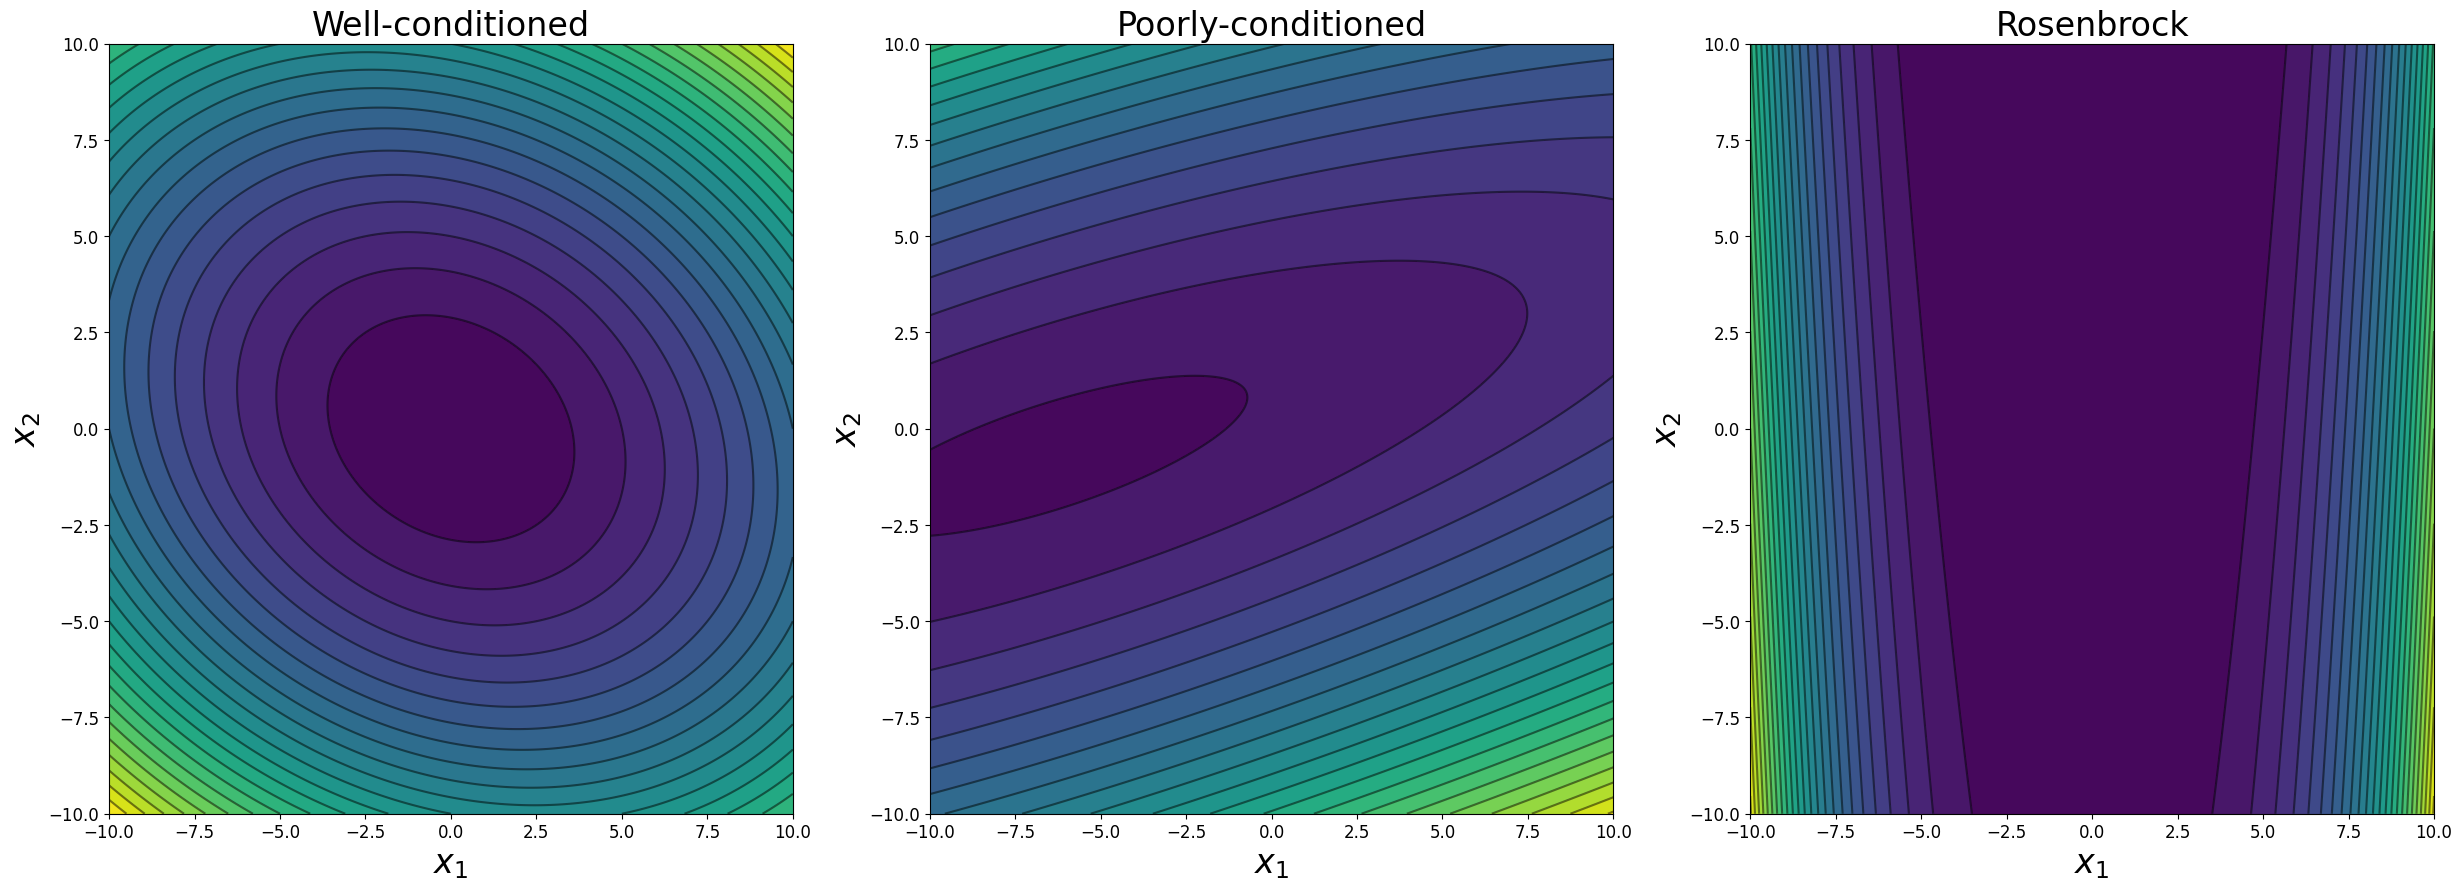

In [166]:
fig, axs = plt.subplots(ncols=N_func, nrows=1, figsize=(10*N_func, 10), subplot_kw={'projection': '3d'})
for k, z, func_lbl in zip(range(N_func), Z, func_labels):
    axs[k].plot_surface(X, Y, z, cmap='viridis', edgecolor='none')    
    axs[k].set_xlabel('$x_1$', fontsize=user_fontsize)
    axs[k].set_ylabel('$x_2$', fontsize=user_fontsize)
    axs[k].set_title(func_lbl, fontsize=user_fontsize)
    
    axs[k].tick_params(axis='x', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='y', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='z', labelsize=user_tickfontsize)
plt.show()

fig, axs = plt.subplots(ncols=N_func, nrows=1, figsize=(10*N_func, 10))
for k, z, func_lbl in zip(range(N_func), Z, func_labels):
    contour = axs[k].contour(X, Y, z, levels=25, colors='black', alpha=0.5)
    axs[k].contourf(X, Y, z, levels=25, cmap='viridis')
    axs[k].set_xlabel('$x_1$', fontsize=user_fontsize)
    axs[k].set_ylabel('$x_2$', fontsize=user_fontsize)
    axs[k].set_title(func_lbl, fontsize=user_fontsize)
    
    axs[k].tick_params(axis='x', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='y', labelsize=user_tickfontsize)
plt.show()


## Метод градиентного спуска с постоянным шагом